# <h>Heart Disease analysis with classification</h>

**Authors:** Lola Sõukand, Robin Mürk

**Data:** https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/discussion

Aim is to build a binary classifier that predicts a person's risk of a heart attack and to analyse individual attributes to determine what lowers and what increases the risk of heart attack using regression analysis.

**Goal 1:** train a model to predict whether or not a patient is at high risk or at low risk of a heart attack.<br>
**Goal 2:** find factors,that lower the risk of heart attack <br>
**Goal 3:** find factors, that increase the risk of heart attack <br>

------------------------------------------  

## Initial data viewing

In [116]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
data=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [117]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<Axes: >

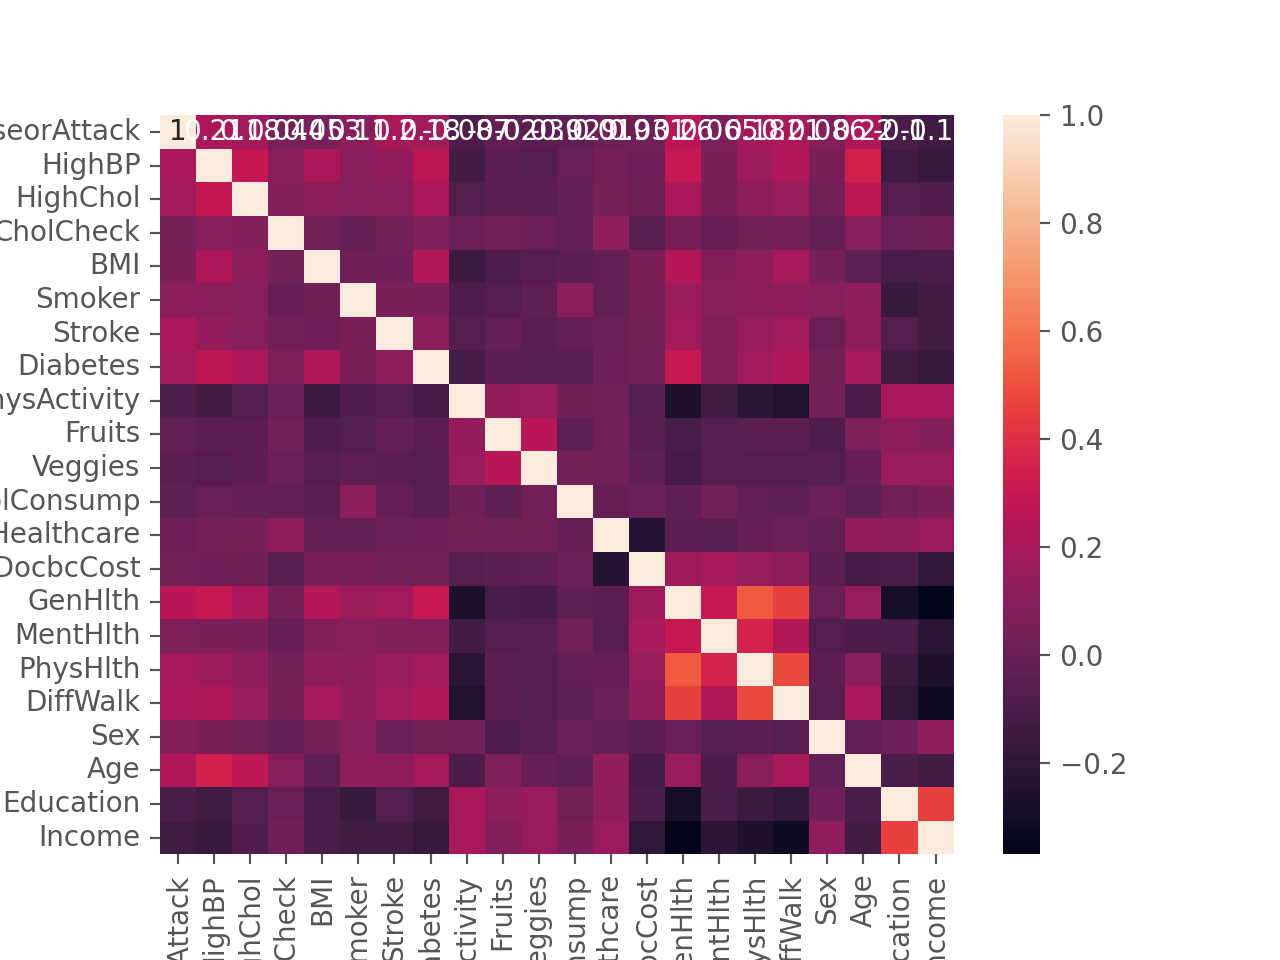

In [119]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

HighBP                      0.0        1.0
HeartDiseaseorAttack                      
0.0                   27.135845  30.001903
1.0                   27.672590  30.063532


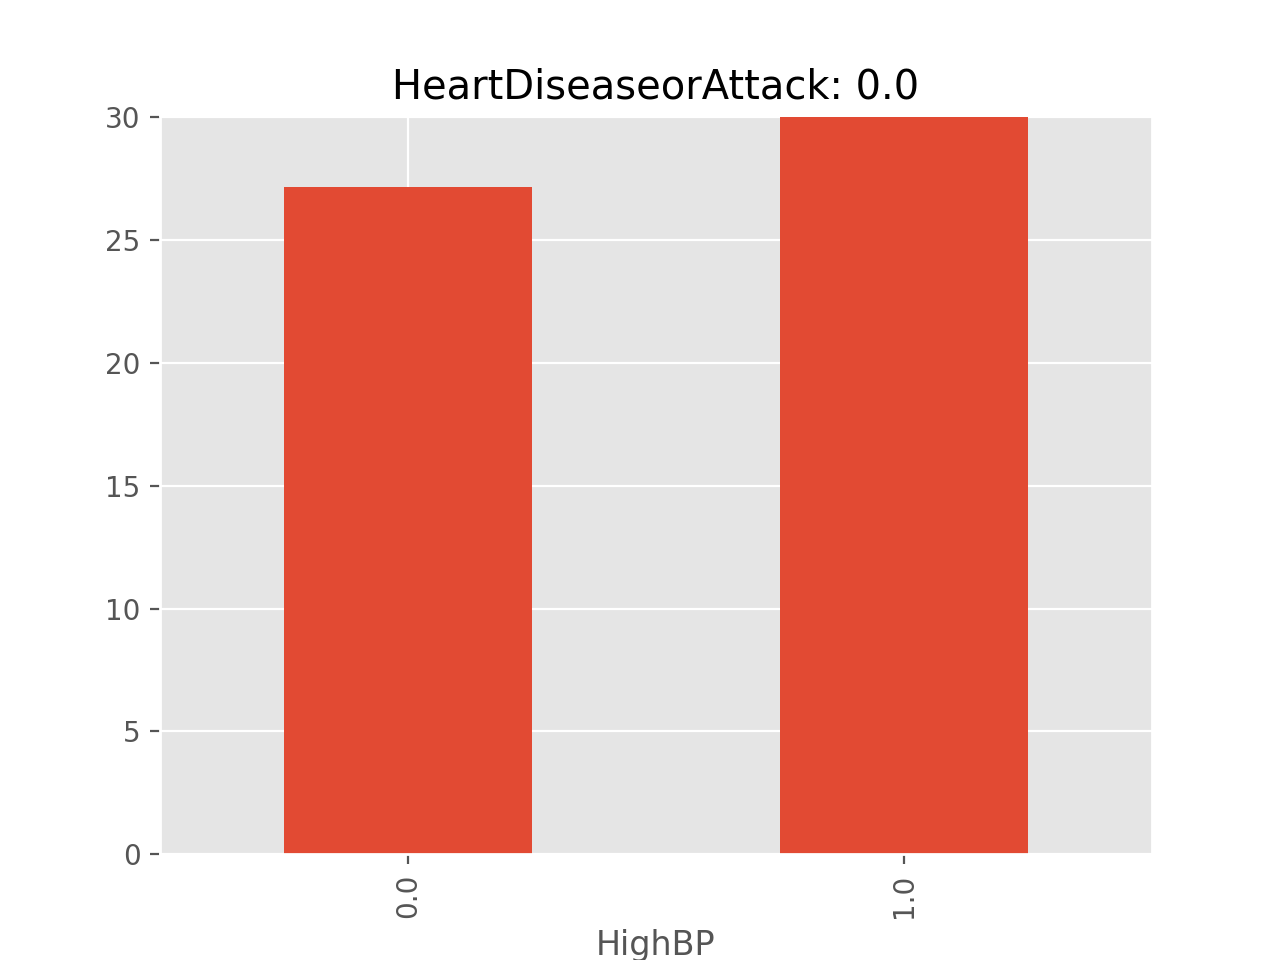

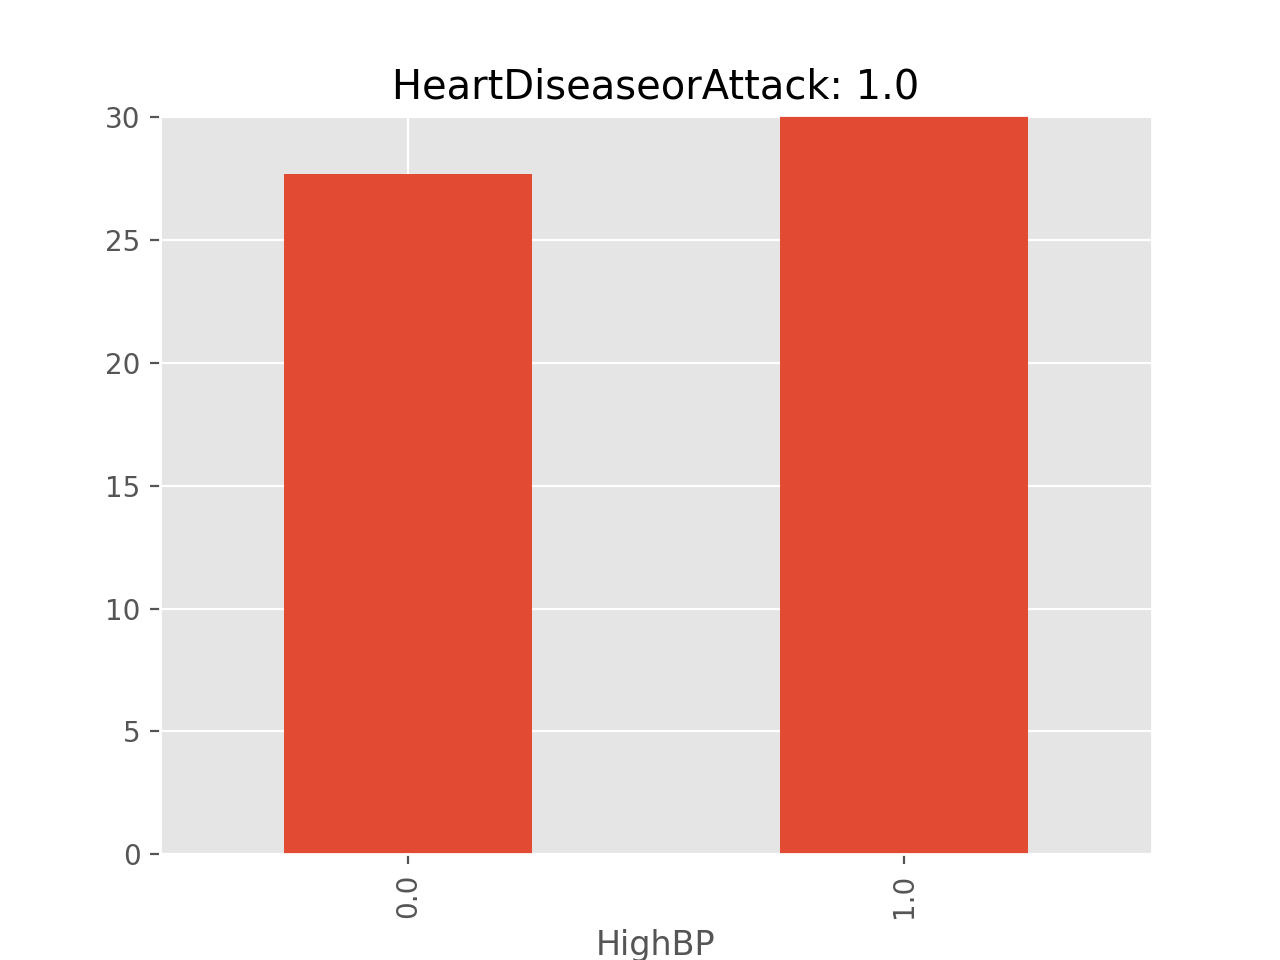

In [120]:
crosstab_df = pd.crosstab(data['HeartDiseaseorAttack'], data['HighBP'], values=data['BMI'], aggfunc='mean')
print(crosstab_df)

if crosstab_df is not ...:
    ymax=crosstab_df.max().max()
    for index, row in crosstab_df.iterrows():
        row.plot(kind="bar", title=f'HeartDiseaseorAttack: {index}')
        plt.ylim(0,ymax)
        plt.show()

<Axes: xlabel='BMI'>

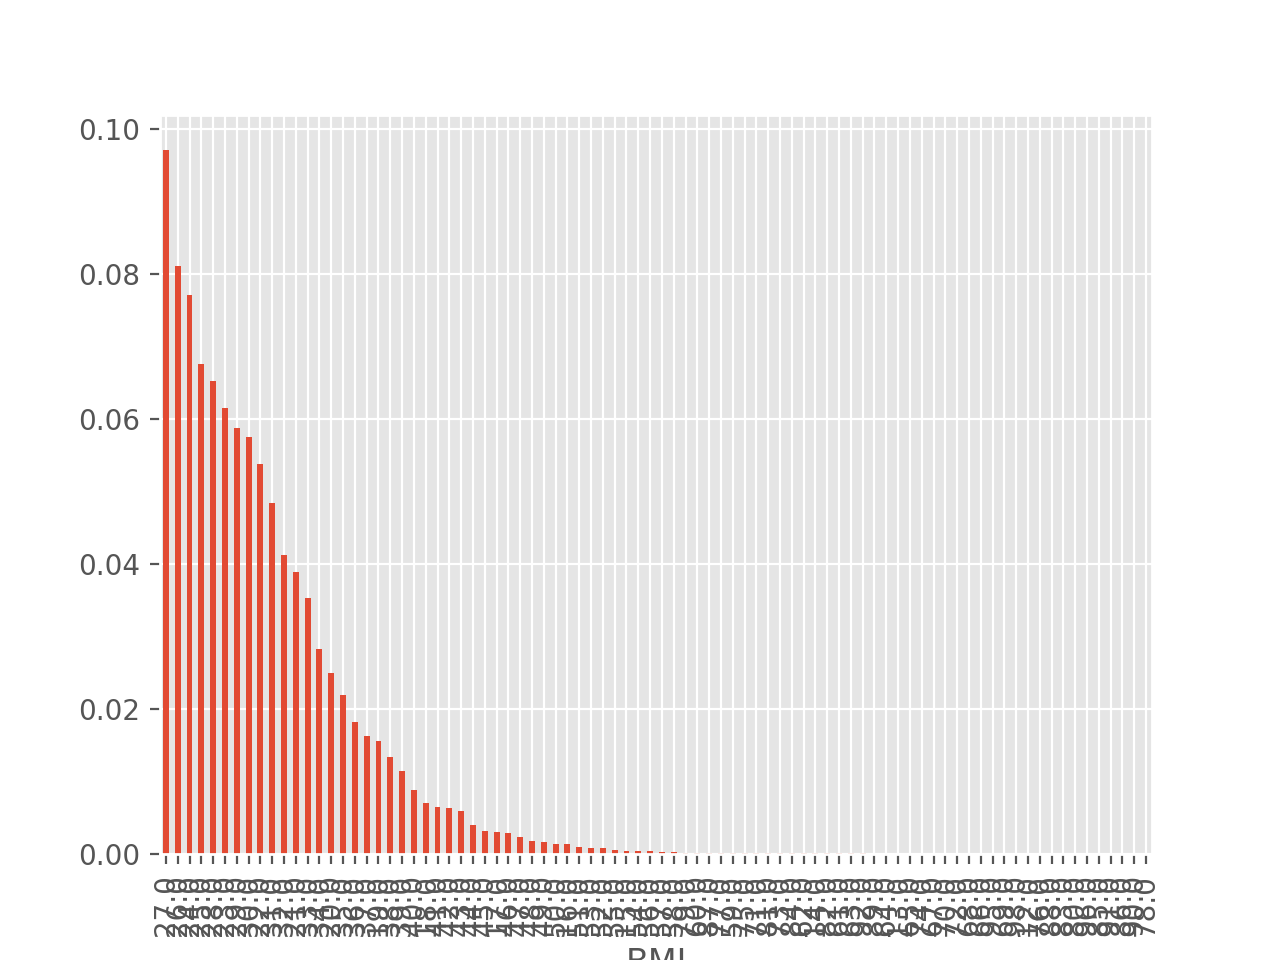

In [121]:
data['BMI'].value_counts(normalize=True).plot(kind="bar")

<Axes: xlabel='Age'>

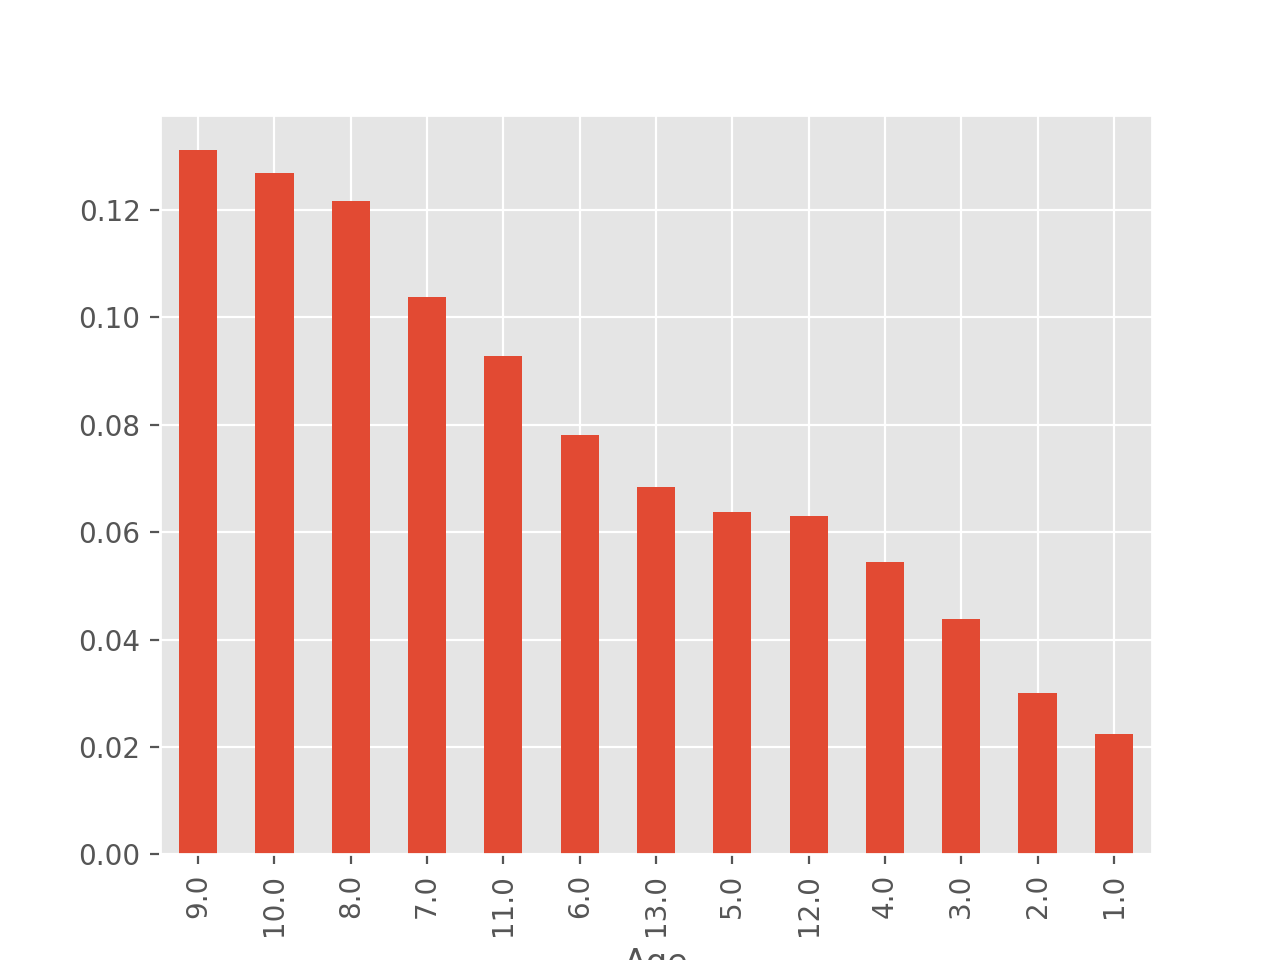

In [122]:
data['Age'].value_counts(normalize=True).plot(kind="bar")

<Axes: >

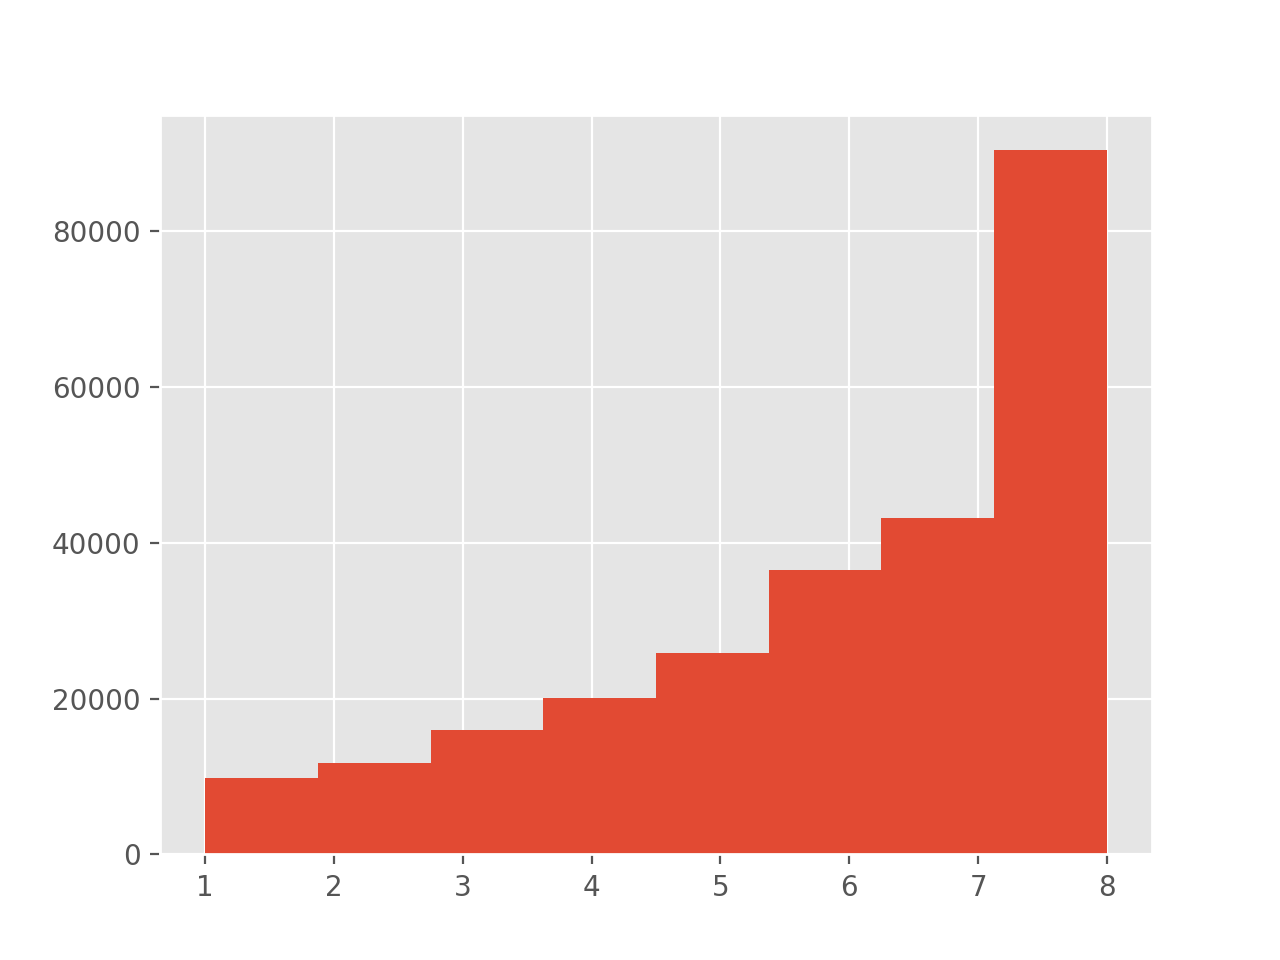

In [123]:
data['Income'].hist(bins=8)

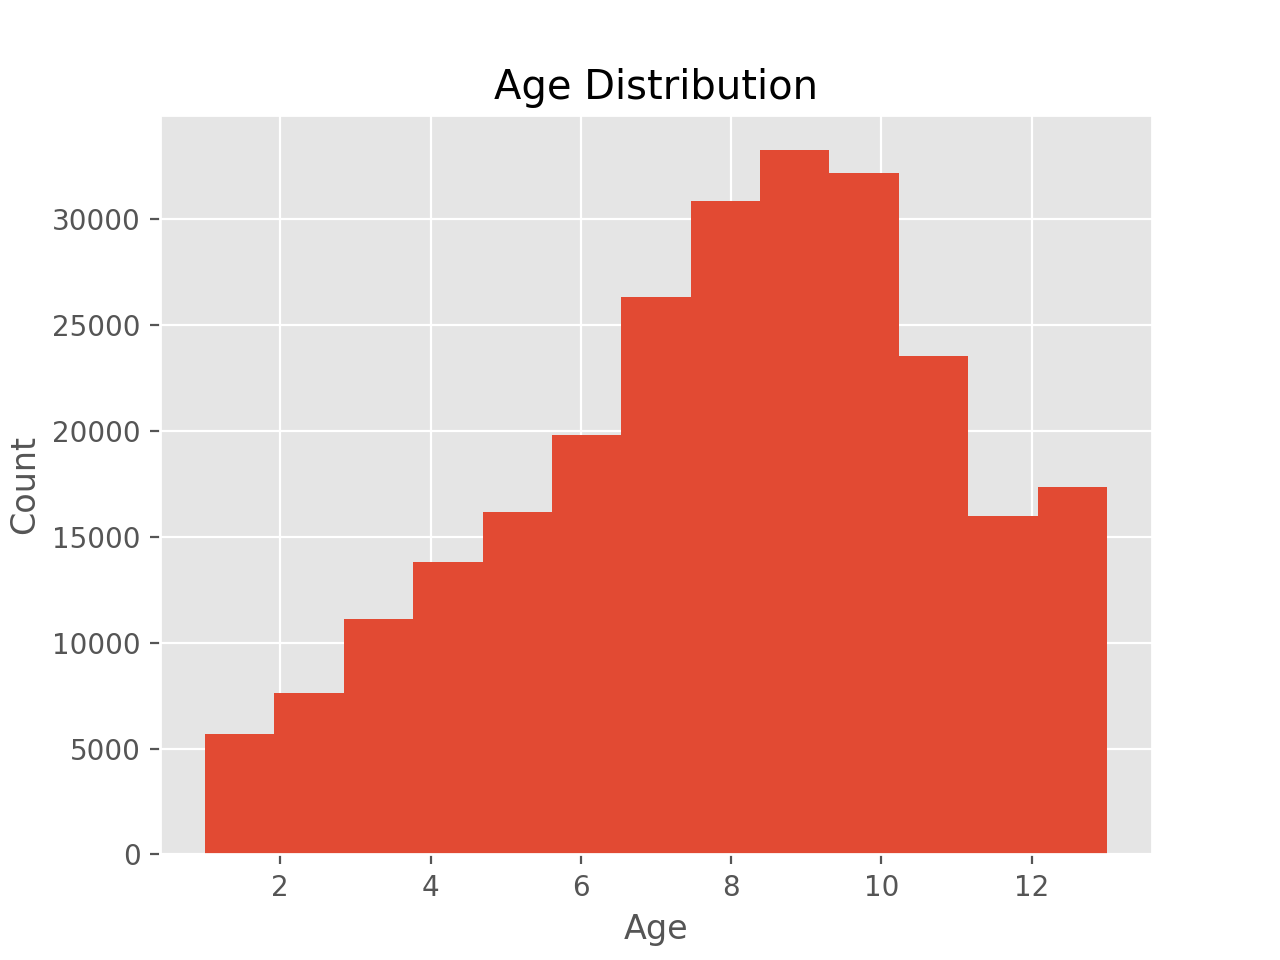

In [124]:
plt.hist(data['Age'], bins=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

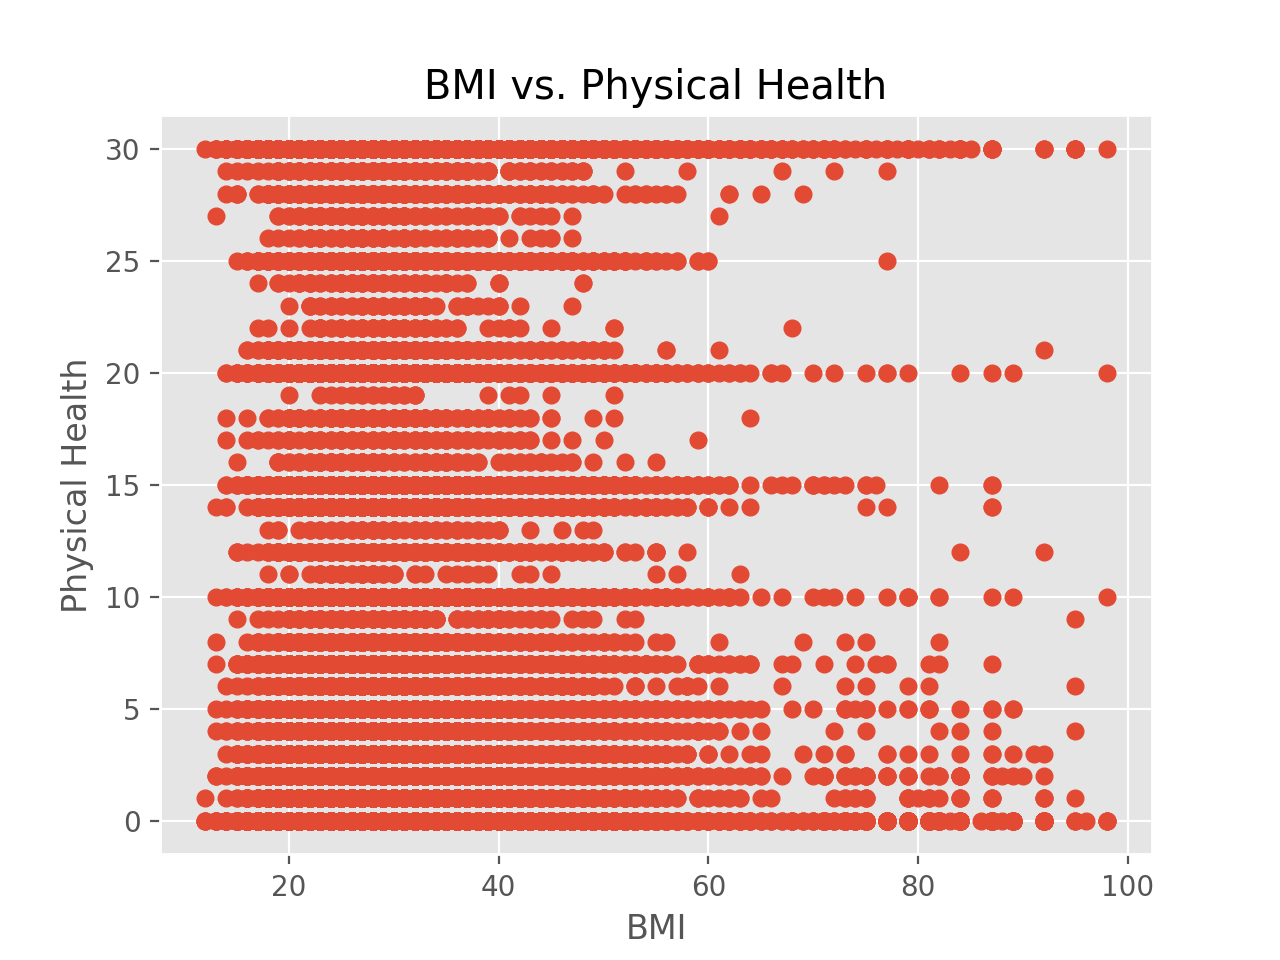

In [125]:
plt.scatter(data['BMI'], data['PhysHlth'])
plt.xlabel('BMI')
plt.ylabel('Physical Health')
plt.title('BMI vs. Physical Health')
plt.show()

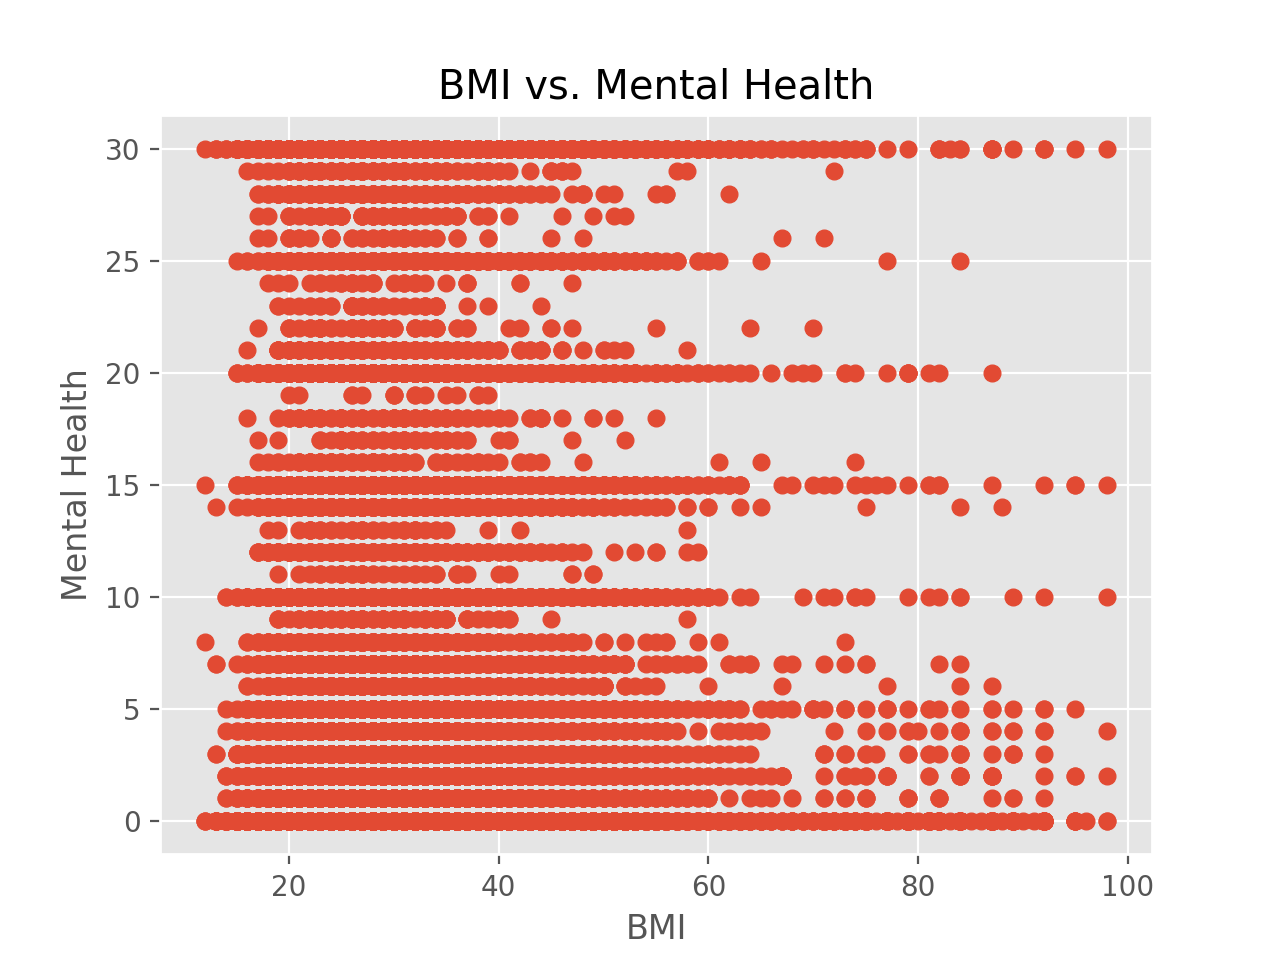

In [126]:
plt.scatter(data['BMI'], data['MentHlth'])
plt.xlabel('BMI')
plt.ylabel('Mental Health')
plt.title('BMI vs. Mental Health')
plt.show()

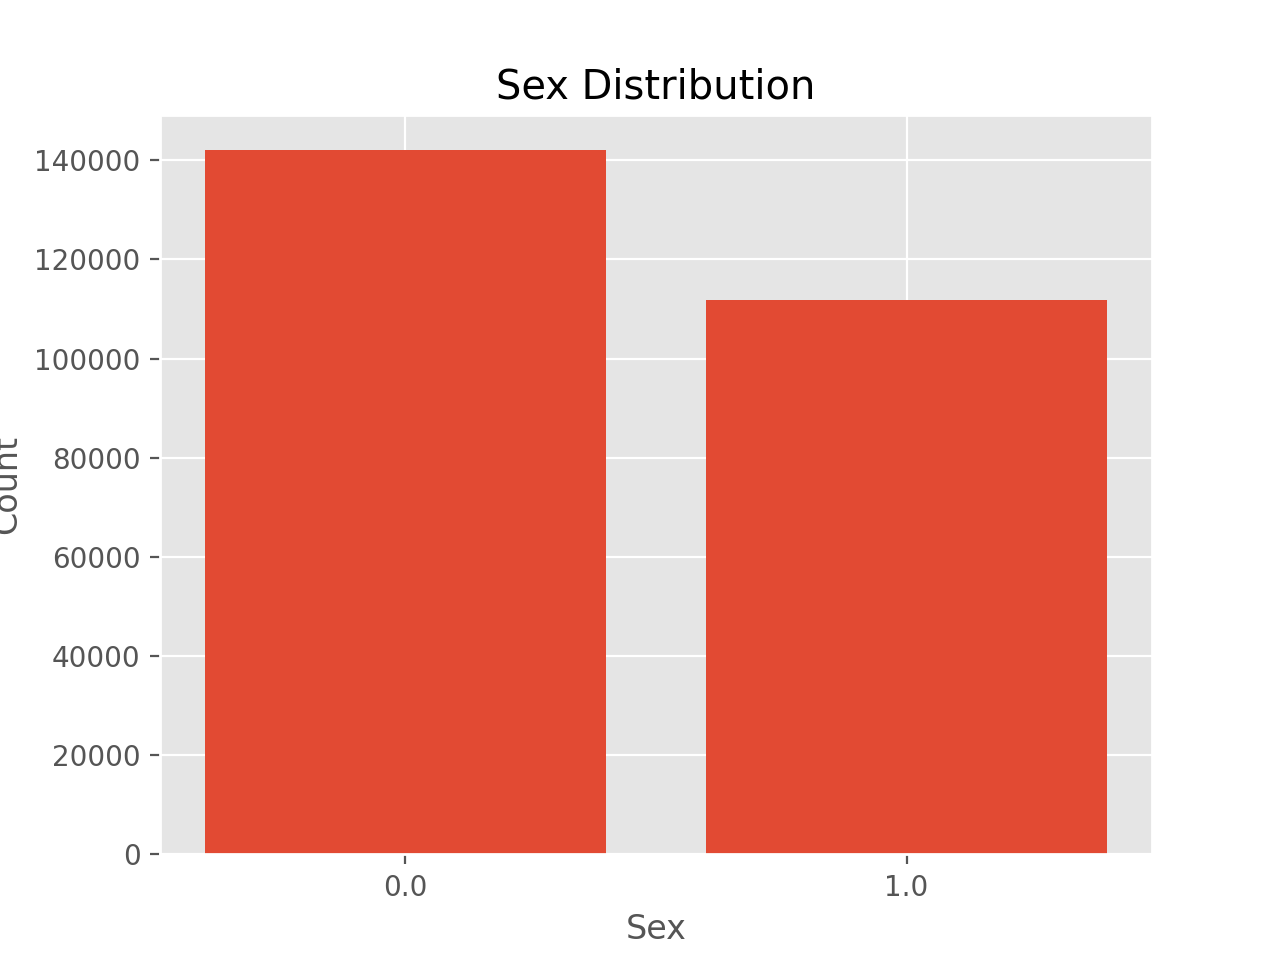

In [127]:
sex_counts = data['Sex'].value_counts()
plt.bar(sex_counts.index.astype(str), sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

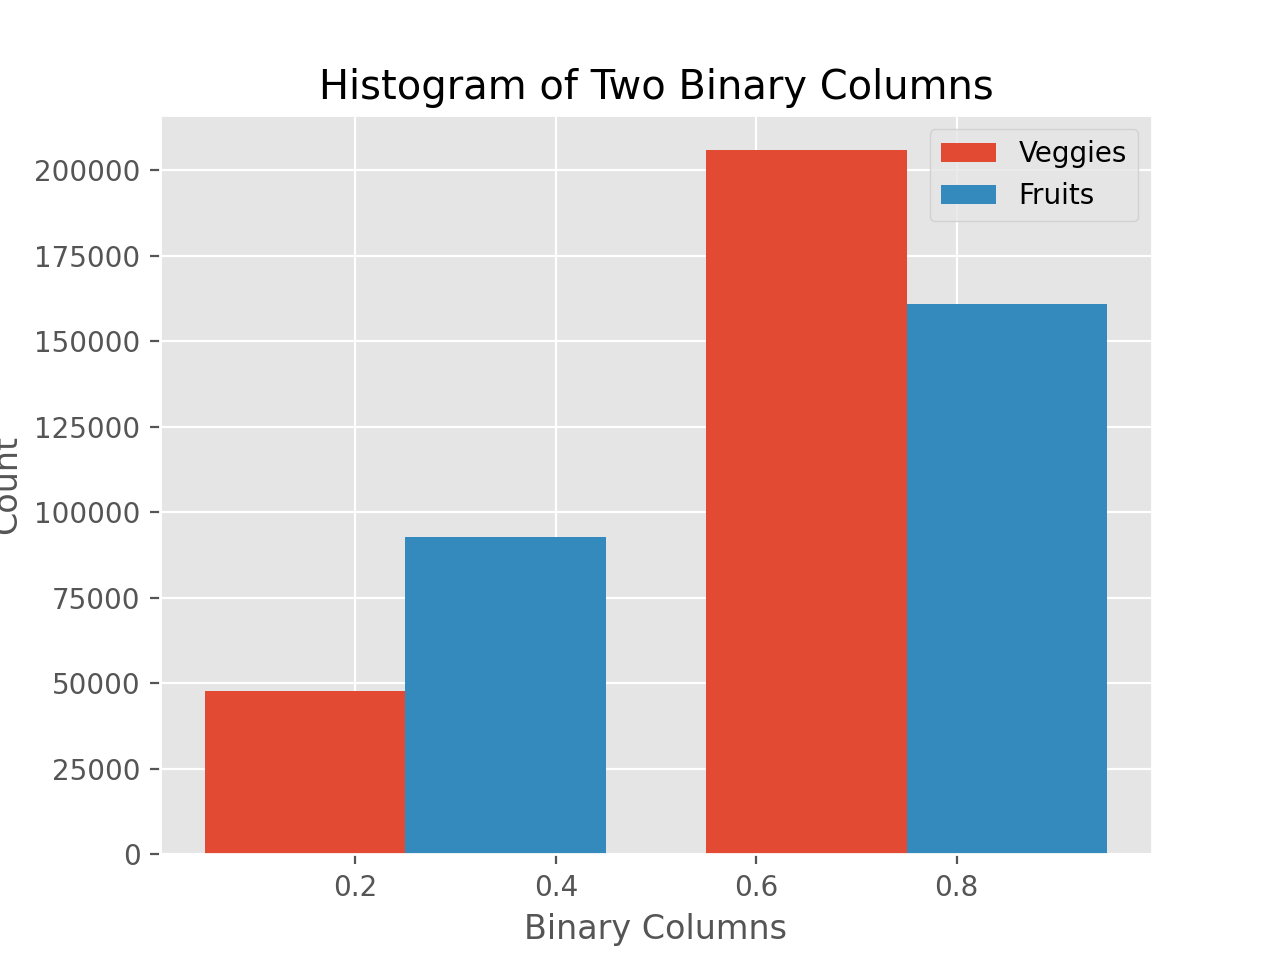

In [128]:
plt.hist([data['Veggies'], data['Fruits']], bins=2, label=['Veggies', 'Fruits'])
plt.xlabel('Binary Columns')
plt.ylabel('Count')
plt.title('Histogram of Two Binary Columns')
plt.legend()
plt.show()

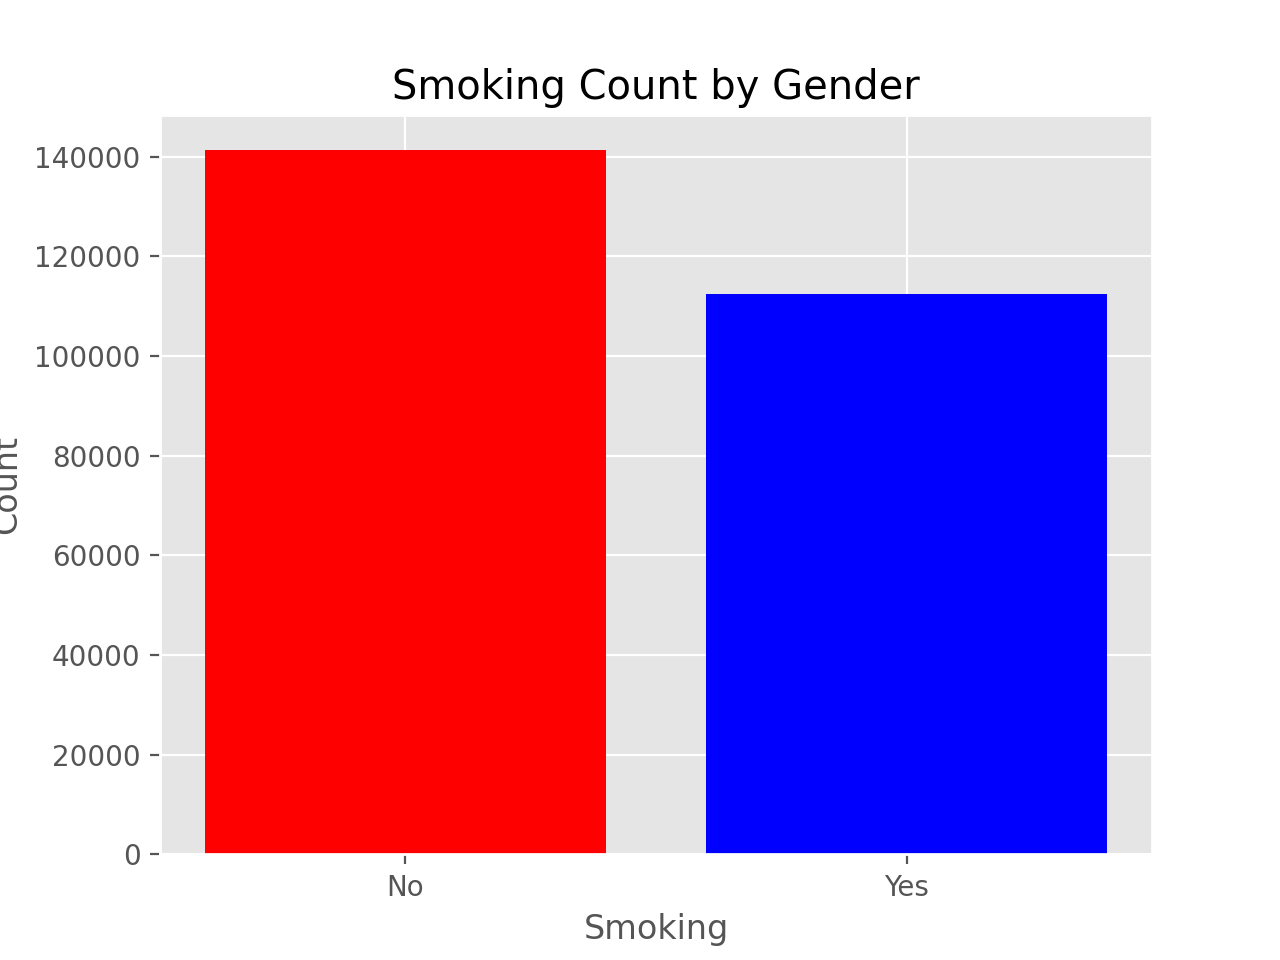

In [129]:
plt.bar(['No', 'Yes'], [data['Smoker'].value_counts()[0], data['Smoker'].value_counts()[1]], color=['red', 'blue'])
plt.bar(['No', 'Yes'], [data['Smoker'].groupby(data['Sex']).value_counts()[0][0], data['Smoker'].groupby(data['Sex']).value_counts()[1][0]], color=['red', 'blue'])
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Smoking Count by Gender')
plt.show()

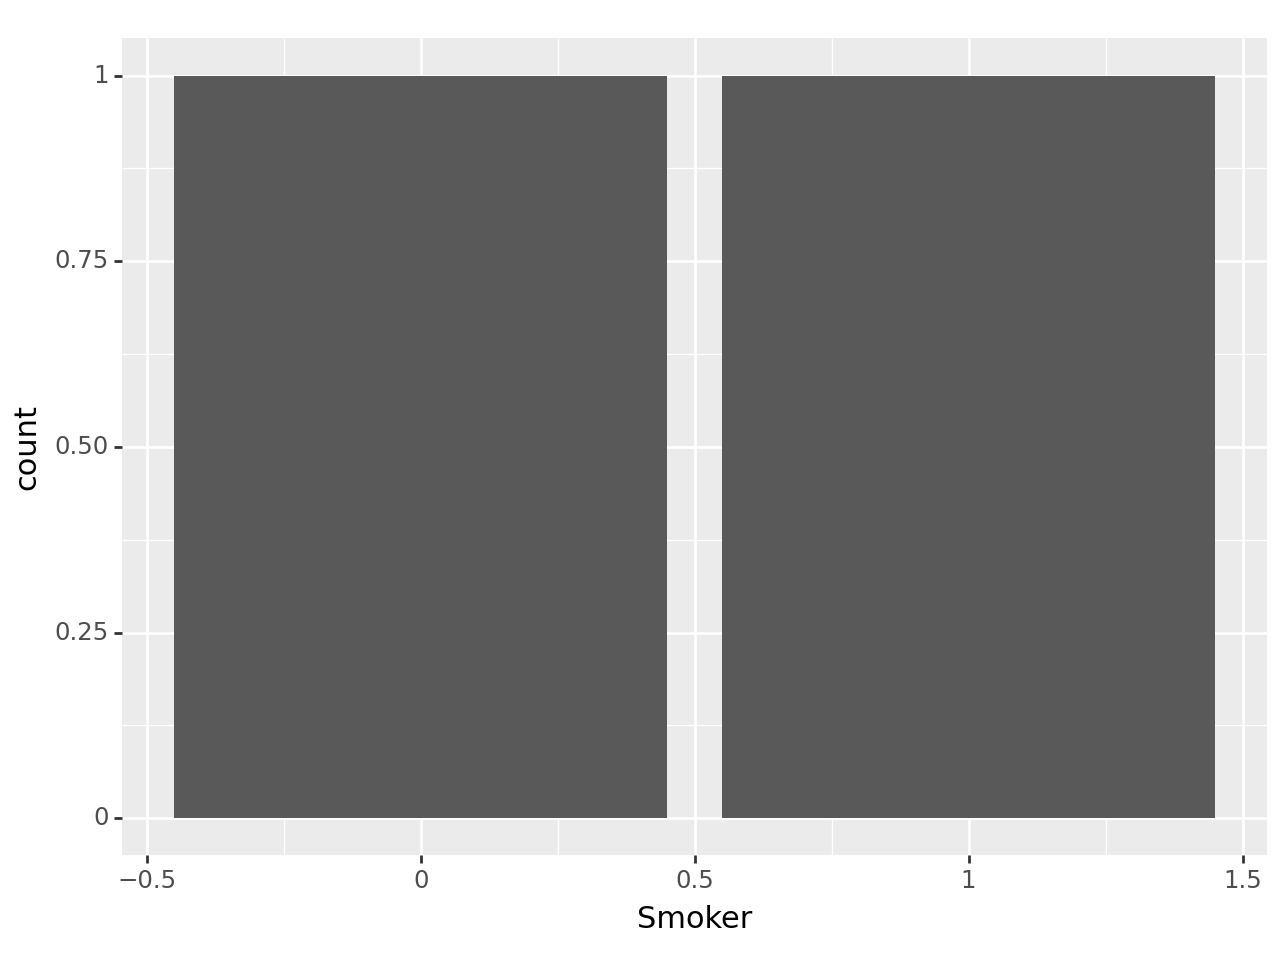

<Figure Size: (640 x 480)>

In [130]:
import pandas as pd
import plotnine as p9
(
p9.ggplot(
    data = data, 
    mapping = p9.aes(x = 'Smoker', fill = 'Sex')
 )+ 
    p9.geom_bar(position = 'fill')
)

In [131]:
#ax = data.plot(x="Age", y="HeartDiseaseorAttack", kind="bar") 

#data.plot(x="Age", y="HighBP", kind="bar", ax=ax, color="maroon")

In [132]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc as AUC, accuracy_score
from numpy import random


In [167]:

amount_to_remove = data.shape[0] - 2*data[data['HeartDiseaseorAttack']==1.0].shape[0]
elements_to_remove = data[data['HeartDiseaseorAttack']==0.0].index
rows_for_droping = np.random.choice(elements_to_remove, size=amount_to_remove,replace=False)
data.drop(rows_for_droping,inplace=True)


#controll for checking that exist the same ammount
print(data.shape[0] == data[data['HeartDiseaseorAttack']==0.0].shape[0] + data[data['HeartDiseaseorAttack']==1.0].shape[0])
print(data.shape)
print(f"with heartattack with 0: {data[data['HeartDiseaseorAttack']==0.0].shape[0]}")
print(f"with heartattack with 1: {data[data['HeartDiseaseorAttack']==1.0].shape[0]}")



#creating the traiing and test set
features = data.drop(columns='HeartDiseaseorAttack',axis=1)
labels = data['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, random_state=4)



svc_params = {
    #'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale'],
    #'degree': [2, 3, 4],
    #'coef0': [0.0, 0.1, 0.5],
    #'shrinking': [True], #False
    #'probability': [True], #False
    #'class_weight': [None, 'balanced']
}
KNN_params ={
    'n_neighbors': np.arange(2,25,1),
    'weights' :['uniform','distance']
}
rand_forest_params = {
    'n_estimators': [200,400,600],
    'criterion': ['gini', 'entropy'],
    #'max_depth': [None, 10,4,19, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5,10,50],
    'max_features': ['sqrt', 'log2']
}


True
(47786, 22)
with heartattack with 0: 23893
with heartattack with 1: 23893


In [168]:
#Finding best parameters for the KNeighboursClassifier()
# 'n_neighbours best seems to be 23 

KNN_best = {}
best_known_sum = 0
X_training, X_validation, y_training, y_validation = train_test_split(X_train,y_train, test_size=0.3, random_state=4)

for n in KNN_params['n_neighbors']:
    for weight in KNN_params['weights']:
        model = KNeighborsClassifier(n_jobs=-1,n_neighbors=n,weights=weight,algorithm='auto',p=p)
        model.fit(X_training, y_training)
        print("trained KNN")
        prediction = model.predict(X_validation)

        fpr, tpr, thresholds = roc_curve(y_validation,prediction)
        print("got fpr and tpr for KNN")
        auc_score = AUC(fpr,tpr)
        acc = accuracy_score(y_true=y_validation,y_pred=prediction)
        print(acc)
        print("got AUC for KNN")

        if best_known_sum < acc:
            params = model.get_params()
            KNN_best = {
                'parameters' : params,
                'auc' : auc_score,
                'accuracy' : acc,
                'fpr' : fpr,
                'tpr' : tpr
            }
            best_known_sum = acc    
                



print("Done with KNN")

trained KNN
got fpr and tpr for KNN
0.6585949177877429
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.671549576482312
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7081215744892875
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7081215744892875
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.6993522670652715
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.708221225710015
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7292476332835077
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7287493771798704
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7164922770303936
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7263577478824116
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7359242650722472
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7358246138515196
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.729745889387145
got AUC for KNN
trained KNN
got fpr and tpr for KNN
0.7340308918784255
got AUC for KNN
trained K

In [169]:
#Finding best parameters for the RandomForestClassifer()
Random_forest_best = []
best_known_sum = 0
X_training, X_validation, y_training, y_validation = train_test_split(X_train,y_train, test_size=0.3, random_state=4)

#random_state =2
for n in rand_forest_params['n_estimators']:
    for criterion in rand_forest_params['criterion']:
        for leaf in rand_forest_params['min_samples_leaf']:
            for feature in rand_forest_params['max_features']:
                model = RandomForestClassifier(oob_score=True,n_jobs=-1, \
                    n_estimators=n,criterion=criterion,max_features=feature,random_state=2,min_samples_leaf = leaf)
                model.fit(X_training, y_training)
                print("trained Random forest")
                prediction = model.predict(X_validation)

                #acc = accuracy_score(y_validation, model.predict(X_validation))
                fpr, tpr, thresholds = roc_curve(y_validation,prediction)
                auc_score = AUC(fpr,tpr)
                acc = accuracy_score(y_validation,prediction)

                if best_known_sum < acc:
                    params = model.get_params()
                    Random_forest_best = {
                        'parameters' : params,
                        'auc' : auc_score,
                        'accuracy' : acc,
                        'fpr' : fpr,
                        'tpr' : tpr
                    }
                    best_known_sum = acc   

print("Done with Random forest\n")
print(Random_forest_best)

trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
trained Random forest
Done with Random forest

{'parameters': {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None,

In [170]:
print(KNN_best)
print(Random_forest_best)

{'parameters': {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 23, 'p': 2, 'weights': 'uniform'}, 'auc': 0.7520882181791078, 'accuracy': 0.7510712506228201, 'fpr': array([0.        , 0.31129855, 1.        ]), 'tpr': array([0.        , 0.81547498, 1.        ])}
{'parameters': {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 600, 'n_jobs': -1, 'oob_score': True, 'random_state': 2, 'verbose': 0, 'warm_start': False}, 'auc': 0.7765586086534191, 'accuracy': 0.7757847533632287, 'fpr': array([0.        , 0.27167517, 1.        ]), 'tpr': array([0.        , 0.82479238, 1.        ])}


In [171]:
def plot_ROC(name,fpr,tpr,roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

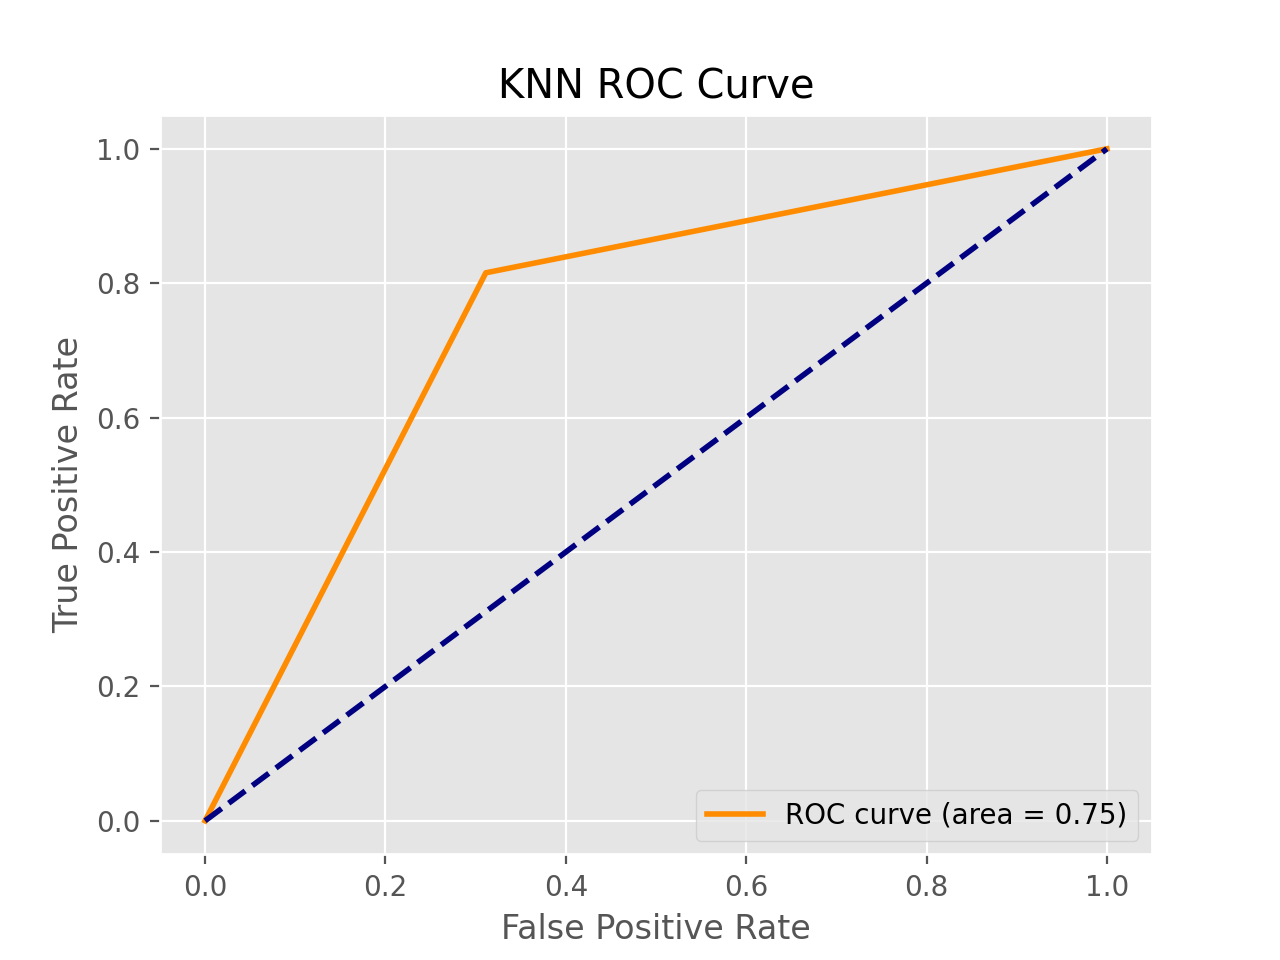

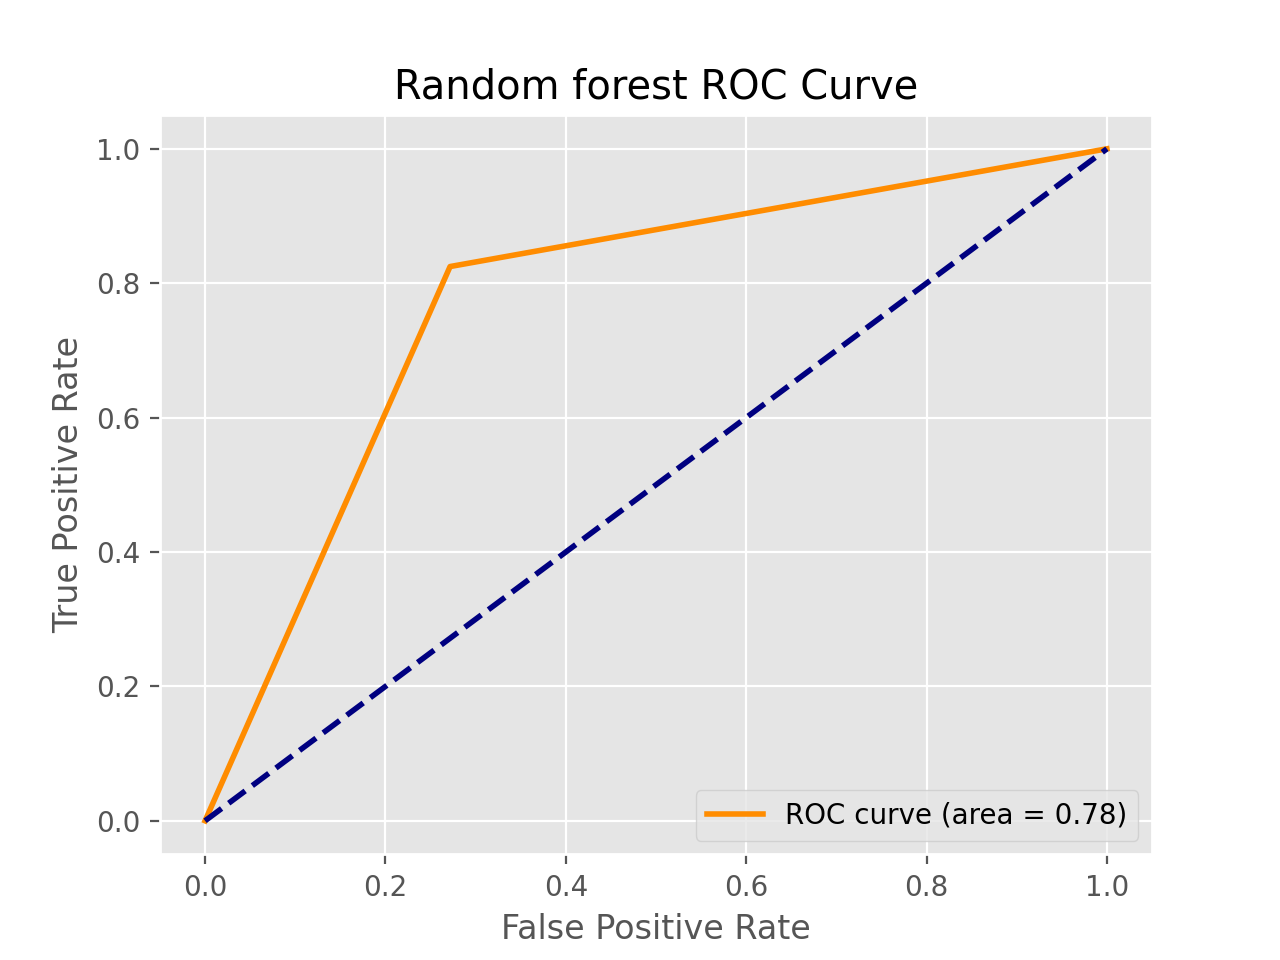

In [172]:
plot_ROC('KNN',KNN_best['fpr'],KNN_best['tpr'],KNN_best['auc'])
plot_ROC('Random forest',Random_forest_best['fpr'],Random_forest_best['tpr'],Random_forest_best['auc'])